# Note : Binnig is used to conver the continious data into categorical data
# There are 1. uniform binjin g, 2. quantile binning 3. kmeans binning in this note book
## one another type is binarization which convert the numeric data into catrgoricl 0 and 1 binary number

In [60]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

In [10]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [11]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']),usecols=['Survived','Age','Fare'])

In [12]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [13]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [16]:
X =  df.drop(columns=['Survived'])

In [17]:
y = df['Survived']

In [21]:
print(X.shape)
print(y.shape)

(714, 2)
(714,)


In [22]:
X_train, X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2 ,random_state= 42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [24]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred =clf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model:", accuracy_score(y_test,y_pred))

Accuracy of the Model: 0.6223776223776224


In [28]:
# Cross validation
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6317097026604068

# Now lets apply the binning

In [32]:
kbin_age = KBinsDiscretizer(n_bins=15 , encode='ordinal' , strategy= 'quantile')
kbin_fare = KBinsDiscretizer(n_bins=15 , encode ='ordinal' , strategy= 'quantile')

In [33]:
#Now apply the columns transformer
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second' , kbin_fare,[1])
])

In [35]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

In [38]:
trf.named_transformers_['first'].bin_edges_

array([array([ 1.        ,  9.        , 15.9       , 17.        , 20.        ,
              21.        , 24.        , 26.        , 28.        , 30.1       ,
              33.66666667, 36.        , 38.6       , 44.06666667, 52.        ,
              62.        ])                                                   ],
      dtype=object)

In [39]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.        ,   7.17166667,   7.77333333,   7.925     ,
                8.05      ,   9.5       ,  10.5       ,  13.        ,
               17.69333333,  22.62      ,  26.35276667,  31.275     ,
               38.1       ,  53.22666667,  79.27666667, 512.3292    ])],
      dtype=object)

In [41]:
output=pd.DataFrame(
    { 'age':X_train['Age'],
      'age_trf':X_train_trf[:,0],
      'fare': X_train['Fare'],
      'fare_trf':X_train_trf[:,1]
    }
)

In [43]:
output.head(7)

,age,age_trf,fare,fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0
30,40.0,11.0,27.7208,10.0
287,22.0,4.0,7.8958,3.0


In [45]:
# now again train and test the model
clf1 = DecisionTreeClassifier()
clf1.fit(X_train_trf , y_train)

DecisionTreeClassifier()

In [46]:
y_pred2 = clf1.predict(X_test_trf)

In [47]:
print("Accuracy of Model:",accuracy_score(y_test , y_pred2))

Accuracy of Model: 0.6503496503496503


In [49]:
np.mean(cross_val_score(DecisionTreeClassifier(), X_train_trf, y_train ,cv=10 ,scoring= 'accuracy'))

0.6952208106473078

In [64]:
def Discretize (bins , strategy):
  kbin_age = KBinsDiscretizer(n_bins= bins , encode = 'ordinal' , strategy= strategy)
  kbin_fare =  KBinsDiscretizer(n_bins= bins , encode = 'ordinal' , strategy= strategy)

  trf = ColumnTransformer([
      ('first' , kbin_age ,[0]),
      ('ssecond' , kbin_fare , [1])
  ])

  X_trf = trf.fit_transform(X)

  print(np.mean(cross_val_score(DecisionTreeClassifier(),X , y , cv = 10 , scoring='accuracy')))

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.histplot(X['Age'])
  plt.title("Before")

  plt.subplot(122)
  sns.histplot(X_trf[:,0] ,color='green')
  plt.title("After")

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.histplot(X['Fare'])
  plt.title("Before")

  plt.subplot(122)
  sns.histplot(X_trf[:,1] ,color='green')
  plt.title("After")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


0.6303012519561815


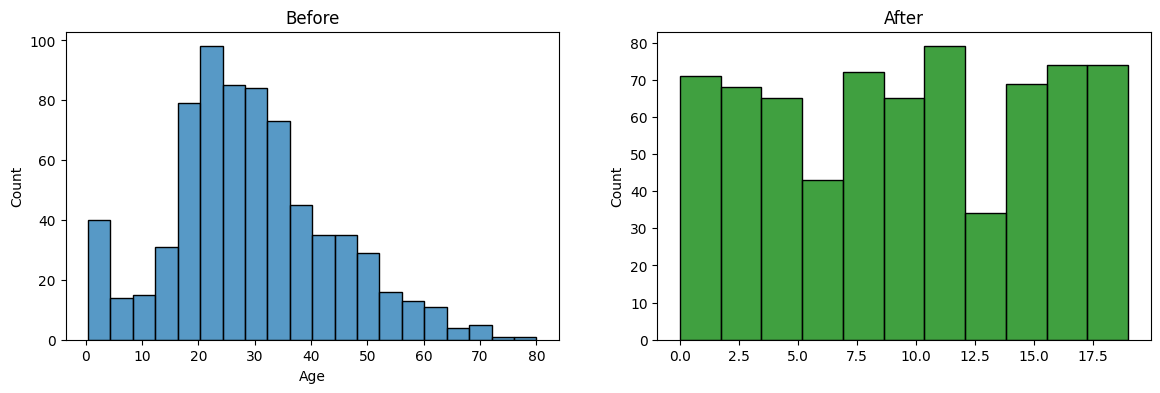

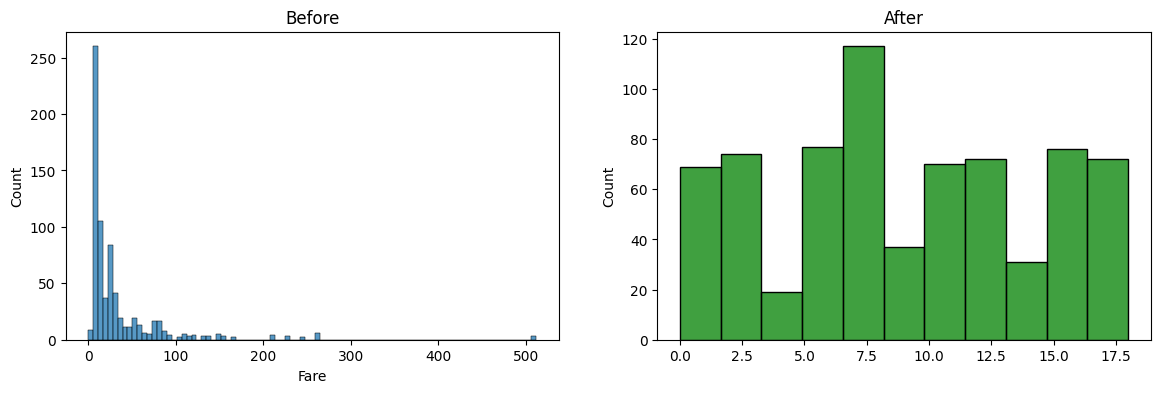

In [70]:
Discretize(20,"quantile")